In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
f='C:/Users/Lenovo/jnotes/Time-Wasters on Social Media.csv'

In [14]:
df = pd.read_csv(f)

In [15]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [17]:
df.isnull().sum()


UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

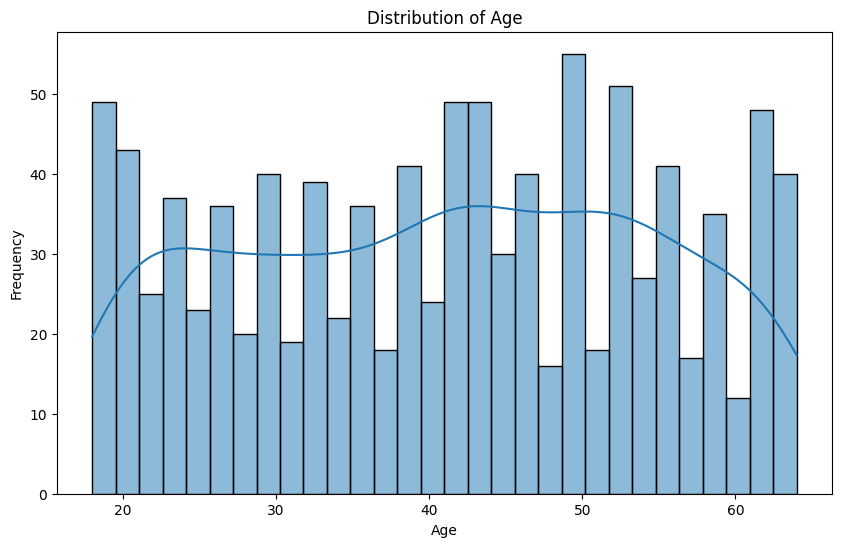

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


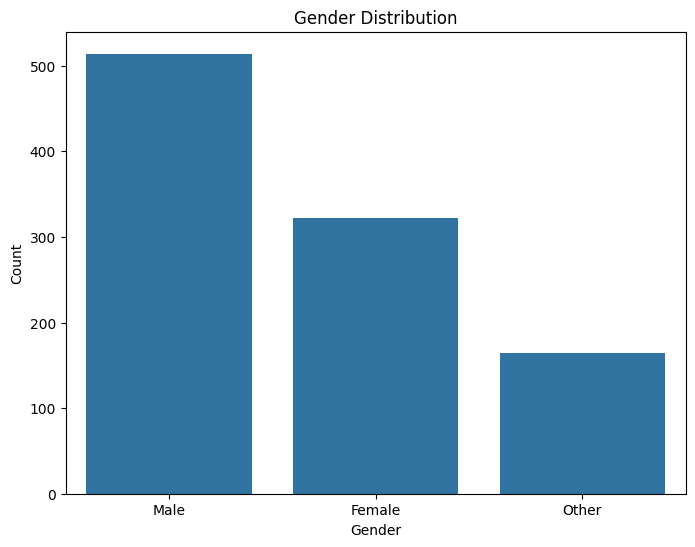

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


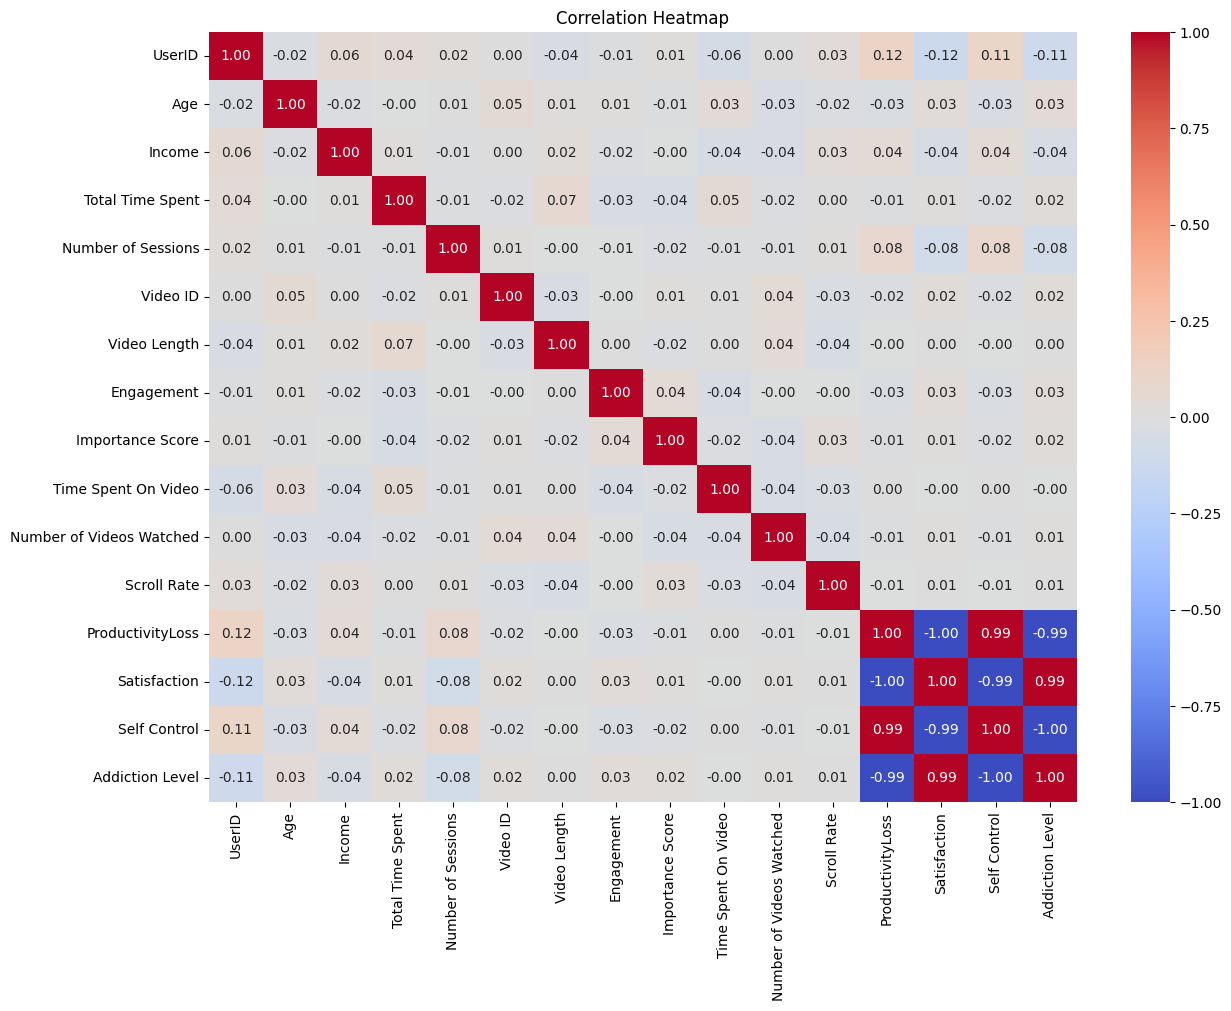

In [20]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
X = df.drop(columns=['ProductivityLoss', 'UserID', 'Watch Time'])
y = df['ProductivityLoss']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9566666666666667

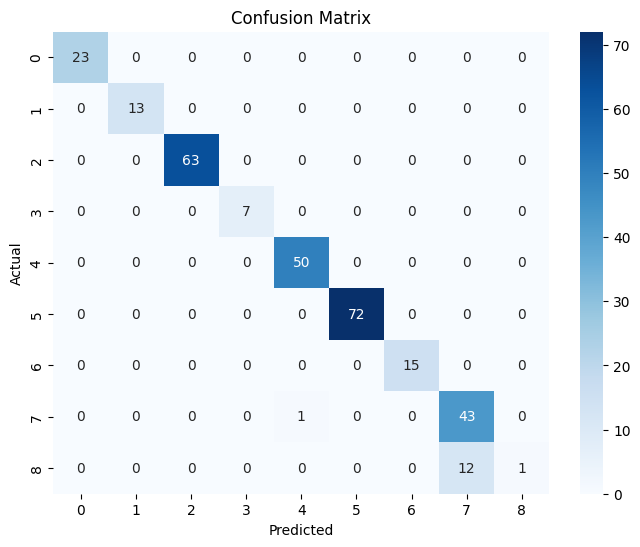

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()